# Save CV2, CV3, FM point source raster centroids
Centroid includes: (0) source_center_slice, (1) sign_amps, (2) alpha_centers, (3) alpha_sigmas, (4) bkg_amps  
Saved file format is: .pkl (non ASCII readable but faster to load)  
Info on pickle file format: https://docs.python.org/3/library/pickle.html

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
# import modules
import funcs
import mrsobs

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

# Get wavelength calibration pixel map
band = '1A'
d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)

# Get spectral resolution table
specres_table = funcs.get_cdps(band,cdpDir)[4]

In [3]:
# Let's construct the spectral grid for the specified MRS band
lambcens,lambfwhms = funcs.spectral_gridding(band,d2cMaps,specres_table=specres_table)

In [6]:
# FM MRS_OPT_01 (MRS FOV and Distortion Measurements)
FM_MRS_OPT_01_raster_centroid = {}
pointings = np.arange(1,64)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')
    
    FM_MRS_OPT_01_raster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_01_raster_centroid,'FM_MRS_OPT_01_raster_centroid',path='obj/' )

Pointing P1
STEP 1: Rough centroiding
Slice 1 has the largest summed flux
Source position: beta = -1.77arcsec, alpha = -1.33arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 210, 211, 212, 213, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 210, 211, 212, 213, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P2
STEP 1: Rough centroiding
Sli

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 343, 344, 345, 346, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P11
STEP 1: Rough centroiding
Slice 5 has the largest summed flux
Source position: beta = -1.06arcsec, alpha = -0.1arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following b

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P20
STEP 1: Rough centroiding
Slice 7 has the largest summed flux
Source position: beta = -0.71arcsec, alpha = -0.1arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fi

The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P28
STEP 1: Rough centroiding
Slice 11 has the largest summed flux
Source position: beta = 0.0arcsec, alpha = -1.38arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 295, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 293, 294, 295, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 59

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 319, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P37
STEP 1: Rough centroiding
Slice 13 has the largest summed flux
Source position: beta = 0.35arcsec, alpha = -1.36arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0,

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P46
STEP 1: Rough centroiding
Slice 16 has the largest summed flux
Source position: beta = 0.89arcsec, alpha = -1.36arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to

The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 369, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P54
STEP 1: Rough centroiding
Slice 18 has the largest summed flux
Source position: beta = 1.24arcsec, alpha = 1.13arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P63
STEP 1: Rough centroiding
Slice 21 has the largest summed flux
Source position: beta = 1.77arcsec, alpha = 1.15arcsec 



In [7]:
# FM MRS_OPT_02 (MRS Image Quality)
FM_MRS_OPT_02_centroid = {}
pointings = np.arange(1,13)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_02_obs(lvl2path,pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')
    
    FM_MRS_OPT_02_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_02_centroid,'FM_MRS_OPT_02_centroid',path='obj/' )

Pointing P1
STEP 1: Rough centroiding
Slice 8 has the largest summed flux
Source position: beta = -0.53arcsec, alpha = -1.02arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 302, 303, 304, 305, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 

[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P10
STEP 1: Rough centroiding
Slice 15 has the largest summed flux
Source position: beta = 0.71arcsec, alpha = -1.01arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed t

In [8]:
# FM MRS_OPT_06 (Across Slit Scans) - Left
FM_MRS_OPT_06_leftraster_centroid = {}
pointings = np.arange(1,24)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='left',pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')
    
    FM_MRS_OPT_06_leftraster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_06_leftraster_centroid,'FM_MRS_OPT_06_leftraster_centroid',path='obj/' )

Pointing P1
STEP 1: Rough centroiding
Slice 6 has the largest summed flux
Source position: beta = -0.89arcsec, alpha = -1.1arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 121, 122, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 121, 122, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P2
STEP 1

[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P10
STEP 1: Rough centroiding
Slice 10 has the largest summed flux
Source position: beta = -0.18arcsec, alpha = -1.1arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 589, 590, 591, 592, 593, 594, 595, 596

The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P18
STEP 1: Rough centroiding
Slice 12 has the largest summed flux
Source position: beta = 0.18arcsec, alpha = -1.16arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 2, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [9]:
# FM MRS_OPT_06 (Across Slit Scans) - Middle
FM_MRS_OPT_06_middleraster_centroid = {}
pointings = np.arange(1,28)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='middle',pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')
    
    FM_MRS_OPT_06_middleraster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_06_middleraster_centroid,'FM_MRS_OPT_06_middleraster_centroid',path='obj/' )

Pointing P1
STEP 1: Rough centroiding
Slice 7 has the largest summed flux
Source position: beta = -0.71arcsec, alpha = -0.02arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P2
STEP 1: Roug

[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P10
STEP 1: Rough centroiding
Slice 12 has the largest summed flux
Source position: beta = 0.18arcsec, alpha = -0.03arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3,

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P19
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -0.03arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]


In [10]:
# FM MRS_OPT_06 (Across Slit Scans) - Right
FM_MRS_OPT_06_rightraster_centroid = {}
pointings = np.arange(1,24)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='right',pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')
    
    FM_MRS_OPT_06_rightraster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_06_rightraster_centroid,'FM_MRS_OPT_06_rightraster_centroid',path='obj/' )

Pointing P1
STEP 1: Rough centroiding
Slice 11 has the largest summed flux
Source position: beta = 0.0arcsec, alpha = 0.97arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P11
STEP 1: Rough centroiding
Slice 16 has the largest summed flux
Source position: beta = 0.89arcsec, alpha = 0.97arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to 

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 589, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P20
STEP 1: Rough centroiding
Slice 19 has the largest summed flux
Source position: beta = 1.42arcsec, alpha = 0.96arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] 

In [ ]:
# # CV1RR MRS_OPT_02
# lvl2path  = workDir+'CV1RR_data/LVL2/'
# CV1RR_MRS_OPT_02_centroid = {}
# CV1RR_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV1RR')
# pointings = CV1RR_pointings_dict.keys()
# for pointing in pointings:
#     print 'Pointing {}'.format(pointing)
#     point_source_sci = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV1RR',pointing=pointing)
#     point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_sci)
    
#     pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0,campaign='CV1RR')
    
#     CV1RR_MRS_OPT_02_centroid[pointing] = pointsource_centroid
# funcs.save_obj(CV1RR_MRS_OPT_02_centroid,'CV1RR_MRS_OPT_02_centroid',path='obj/' )

In [11]:
# CV2 MRS_OPT_02
from astropy.io import fits
lvl2path  = workDir+'CV2_data/LVL2/'
CV2_MRS_OPT_02_centroid = {}
CV2_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2')
pointings = CV2_pointings_dict.keys()
for pointing in pointings:
    key = pointing.split('_')[1]
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = fits.open(lvl2path+CV2_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV2_pointings_dict[pointing][3])[0].data[0,:,:]
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')
    
    CV2_MRS_OPT_02_centroid[key] = pointsource_centroid
funcs.save_obj(CV2_MRS_OPT_02_centroid,'CV2_MRS_OPT_02_centroid',path='obj/' )

Pointing P4
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = 1.0arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P5
STEP 1: Rough centroiding
Slice 14 has the larges

The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing P9
STEP 1: Rough centroiding
Slice 4 has the largest summed flux
Source position: beta = -1.24arcsec, alpha = -1.31arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 344, 345, 346, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 344, 345, 346, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins fail

[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 180, 185, 186, 191, 202, 213, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 75, 77, 79, 80, 82, 83, 84, 85, 86, 119, 120, 121, 122, 123, 129, 137, 176, 180, 185, 186, 191, 195, 196, 201, 202, 203, 213, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 3

In [13]:
# CV3 MRS_OPT_02
from astropy.io import fits
lvl2path  = workDir+'CV3_data/LVL2/'
CV3_MRS_OPT_02_centroid = {}
CV3_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV3')
pointings = CV3_pointings_dict.keys()
for pointing in pointings:
    key = pointing.split('_')[1]
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = fits.open(lvl2path+CV3_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV3_pointings_dict[pointing][3])[0].data[0,:,:]
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')
    
    CV3_MRS_OPT_02_centroid[key] = pointsource_centroid
funcs.save_obj(CV3_MRS_OPT_02_centroid,'CV3_MRS_OPT_02_centroid',path='obj/' )

Pointing Q16
STEP 1: Rough centroiding
Slice 16 has the largest summed flux
Source position: beta = 0.89arcsec, alpha = -1.19arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing Q14
STEP 1: Rough cen

The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 40, 41, 42, 119, 120, 121, 122, 123, 195, 196, 201, 202, 203, 293, 294, 295, 296, 302, 303, 304, 305, 306, 343, 344, 345, 346, 347, 370, 371, 372, 373, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]
Pointing Q4
STEP 1: Rough centroiding
Slice 14 has the largest summed flux
Source position: beta = 0.53arcsec, alpha = -1.12arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 590, 591, 592, 593, 594, 595, 596, 597]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6

## Visualization

In [14]:
# load all centroids
FM_MRS_OPT_01_raster_centroid       = funcs.load_obj('FM_MRS_OPT_01_raster_centroid',path='obj/')
FM_MRS_OPT_02_centroid              = funcs.load_obj('FM_MRS_OPT_02_centroid',path='obj/')
FM_MRS_OPT_06_leftraster_centroid   = funcs.load_obj('FM_MRS_OPT_06_leftraster_centroid',path='obj/')
FM_MRS_OPT_06_middleraster_centroid = funcs.load_obj('FM_MRS_OPT_06_middleraster_centroid',path='obj/')
FM_MRS_OPT_06_rightraster_centroid  = funcs.load_obj('FM_MRS_OPT_06_rightraster_centroid',path='obj/')
# CV1RR_MRS_OPT_02_centroid           = funcs.load_obj('CV1RR_MRS_OPT_02_centroid',path='obj/')
CV2_MRS_OPT_02_centroid             = funcs.load_obj('CV2_MRS_OPT_02_centroid',path='obj/')
CV3_MRS_OPT_02_centroid             = funcs.load_obj('CV3_MRS_OPT_02_centroid',path='obj/')

<IPython.core.display.Javascript object>


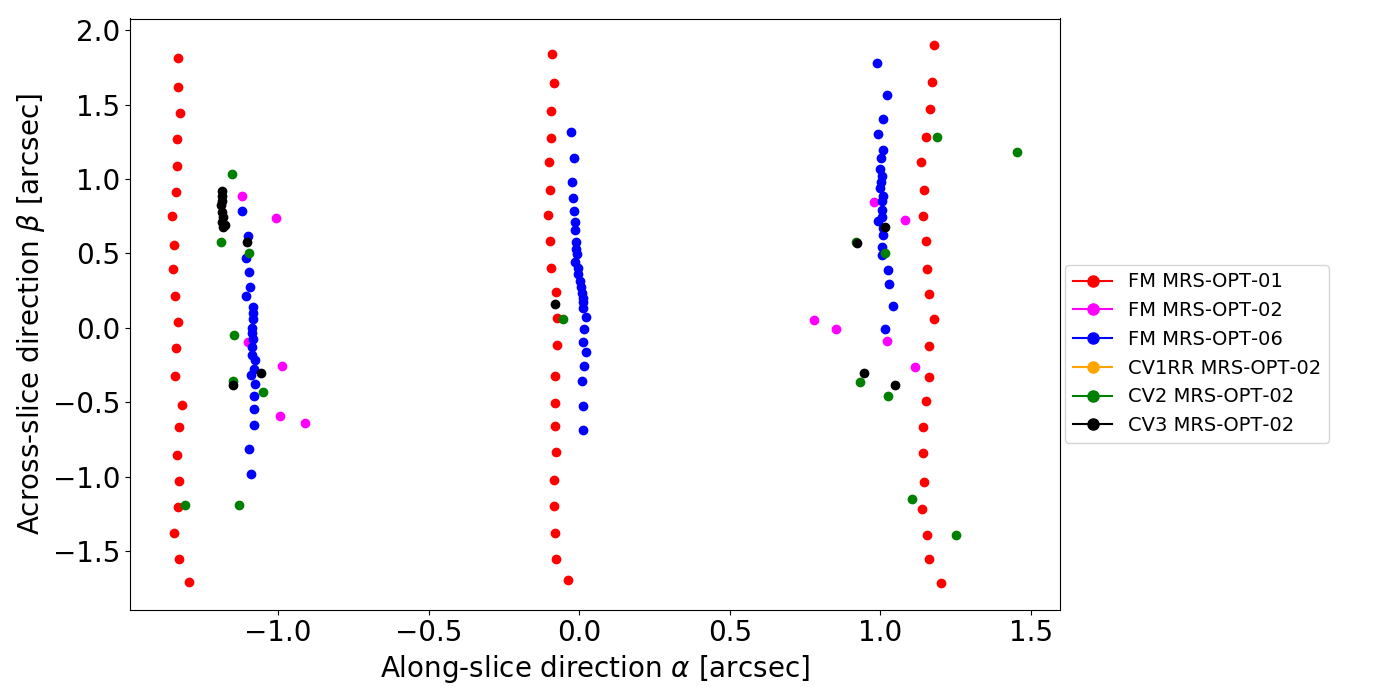

In [25]:
plt.figure(figsize=(14,7))
for pointing in FM_MRS_OPT_01_raster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid[key][1][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][1])]),np.mean(FM_MRS_OPT_01_raster_centroid[key][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][2])]),'ro')
for pointing in FM_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_02_centroid[key][1][~np.isnan(FM_MRS_OPT_02_centroid[key][1])]),np.mean(FM_MRS_OPT_02_centroid[key][2][~np.isnan(FM_MRS_OPT_02_centroid[key][2])]),'o',color='magenta')
for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_leftraster_centroid[key][1][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][1])]),np.mean(FM_MRS_OPT_06_leftraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][2])]),'bo')
for pointing in FM_MRS_OPT_06_middleraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_middleraster_centroid[key][1][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][1])]),np.mean(FM_MRS_OPT_06_middleraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][2])]),'bo')
for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_rightraster_centroid[key][1][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][1])]),np.mean(FM_MRS_OPT_06_rightraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][2])]),'bo')
# # for pointing in CV1RR_MRS_OPT_02_centroid.keys():
# #     key = pointing
# #     plt.plot(np.mean(CV1RR_MRS_OPT_02_centroid[key][2][~np.isnan(CV1RR_MRS_OPT_02_centroid[key][2])]),CV1RR_MRS_OPT_02_centroid[key][0],'o',color='orange')
for pointing in CV2_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV2_MRS_OPT_02_centroid[key][1][~np.isnan(CV2_MRS_OPT_02_centroid[key][1])]),np.mean(CV2_MRS_OPT_02_centroid[key][2][~np.isnan(CV2_MRS_OPT_02_centroid[key][2])]),'go')
for pointing in CV3_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV3_MRS_OPT_02_centroid[key][1][~np.isnan(CV3_MRS_OPT_02_centroid[key][1])]),np.mean(CV3_MRS_OPT_02_centroid[key][2][~np.isnan(CV3_MRS_OPT_02_centroid[key][2])]),'ko')
plt.xlabel(r'Along-slice direction $\alpha$ [arcsec]')
plt.ylabel(r'Across-slice direction $\beta$ [arcsec]')
legend_elements = [Line2D([0],[0],marker='o',color='r',label='FM MRS-OPT-01',markerfacecolor='r',markersize=8),
                   Line2D([0],[0],marker='o',color='magenta',label='FM MRS-OPT-02',markerfacecolor='magenta',markersize=8),
                   Line2D([0],[0],marker='o',color='b',label='FM MRS-OPT-06',markerfacecolor='b',markersize=8),
                   Line2D([0],[0],marker='o',color='g',label='CV2 MRS-OPT-02',markerfacecolor='g',markersize=8),
                   Line2D([0],[0],marker='o',color='k',label='CV3 MRS-OPT-02',markerfacecolor='k',markersize=8)]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.3,0.6))
plt.tight_layout(rect=[0,0,0.77,1])